# Определение перспективного тарифа для телеком компании

По информации о затратах пользователей на услуги связи, требовалось понять какой из тарифов выгоднее для мобильного оператора

### План проекта:  
[Шаг 1. Получение общей информации](#step1)  
[Шаг 2. Обработка данных](#step2)  
- [Обработка пропусков](#step2.1)  
- [Обработка ошибок](#step2.2)  
- [Замена типов данных](#step2.3)    
- [Обработка дубликатов](#step2.4)  
- [Проверка все ли данные относятся к тарифам "смарт" и "ультра"](#step2.5)

[Шаг 3. Создание сводной таблицы о поведении пользователей и выручке в разрезе месяцев](#step3)  
[Шаг 4. Анализ данных](#step4)  
[Шаг 5. Проверка гипотез](#step5)  
[Вывод](#last)

### <a id="step1"> Шаг 1. Получение общей информации</a>

Напишем функцию для пути файла, чтобы файл открывался и на локальном компьютере, и в практикуме

In [1]:
import os
def try_path(path):
    if os.path.exists(path):
        return path
    else:
        return "." + path

Подключим библиотеки, которые нам потребуются в дальнейшем

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from scipy import stats as st

Создадим dataframe c информаций о звонках. Посмотрим 5 случайных записей из него

In [3]:
calls = pd.read_csv(try_path('/datasets/calls.csv'))
calls.sample(5)

,id,call_date,duration,user_id
179735,1449_215,2018-10-04,4.07,1449
47453,1118_742,2018-05-11,4.95,1118
140340,1358_102,2018-11-06,0.00,1358
186595,1460_513,2018-04-25,3.18,1460
36103,1089_576,2018-08-11,7.66,1089


Создадим dataframe c информаций об интернет-сессиях. Посмотрим 5 случайных записей из него

In [4]:
internet = pd.read_csv(try_path('/datasets/internet.csv'), index_col = 0)
internet.sample(5)

,id,mb_used,session_date,user_id
12488,1044_125,604.78,2018-07-18,1044
97430,1327_351,640.92,2018-06-11,1327
41185,1144_345,100.24,2018-08-09,1144
65333,1223_43,1058.36,2018-12-18,1223
116451,1392_194,964.77,2018-03-05,1392


Создадим dataframe c информаций о сообщениях. Посмотрим 5 случайных записей из него

In [5]:
messages = pd.read_csv(try_path('/datasets/messages.csv'))
messages.sample(5)

,id,message_date,user_id
119594,1484_115,2018-08-21,1484
91075,1377_59,2018-03-06,1377
35458,1151_8,2018-10-10,1151
30034,1130_409,2018-06-04,1130
64150,1277_827,2018-08-01,1277


Создадим dataframe c информаций о тарифах. Выведем его на экран

In [6]:
tariffs = pd.read_csv(try_path('/datasets/tariffs.csv'))
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Создадим dataframe c информацией о пользователях. Посмотрим 5 случайных записей из него

In [7]:
users = pd.read_csv(try_path('/datasets/users.csv'))
users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
33,1033,71,NaN,Москва,Лия,Бабушкина,2018-07-15,smart
316,1316,42,NaN,Улан-Удэ,Аурелия,Алымова,2018-11-29,smart
404,1404,61,NaN,Иркутск,Роберт,Уваров,2018-04-18,smart
423,1423,50,NaN,Астрахань,Леон,Силин,2018-01-23,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


Посмотрим информацию о таблицах

In [8]:
datasets = {'tariffs':tariffs, 'messages':messages, 'users':users, 'internet':internet,'calls':calls}

for k in datasets:
    print(k)
    print(datasets[k].info())
    print()

tariffs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None

messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-

Посмотрим описательные статистики по таблицам

In [9]:
for k in datasets:
    print(k)
    display(datasets[k].describe())
    print()

tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000



messages


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000



users


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000



internet


,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000



calls


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


### Вывод
Посмотрели общую информацию по всем пяти таблицам. 
Объем данных следующий:
- тарифы - 2 записи
- пользователи - 500 записей
- интернет-сессии - 149396 записей 
- сообщения - 123036 записей
- звонки - 202607 записей

Есть пропущенные значения:
- churn_date в таблице users. В описании данных есть объяснение, что это означает, что тарифом не прекратили пользоваться на момент выгрузки

Есть ошибки в данных
- звонки по 0 минут
- интернет-сессии по 0 мб

Нужна замена типов данных в столбцах:
- reg_date в таблице users
- id, message_date в таблице messages
- id, mb_used, session_date в таблице internet
- id, call_date, duration в таблице calls

### <a id="step2"> Шаг 2 Обработка данных </a>

### <a id="step2.1"> Обработка пропусков</a>

Проусков данных нет кроме колонки churn_date в таблице users.  В описании данных есть объяснение, что это означает, что тарифом не прекратили пользоваться на момент выгрузки. Так как мы не знаем дату выгрузки - оставим данные как есть

### <a id="step2.2">Обработка ошибок</a>

- Звонки по 0 минут

Посмотрим какой процент записей с нулевыми звонками

In [10]:
print('Процент записей с нулевыми звонками {:.2%}'.format(calls.query('duration == 0').shape[0] / len(calls)))

Процент записей с нулевыми звонками 19.55%


Процент записей с нулевыми звонками высок. Посмотрим как они распределены по пользователям

In [11]:
calls.query('duration == 0').groupby('user_id')['id'].count()
pivot_calls_table = calls.pivot_table(index = 'user_id', values = 'duration',aggfunc = ['count','std','mean']) 
pivot_calls_table.sort_values([('count','duration')], ascending = False)

,count,std,mean
,duration,duration,duration
user_id,,,
1377,1760,5.940000,6.964886
1168,1692,5.890865,6.870124
1375,1560,5.930092,6.895622
1453,1440,5.904059,6.743993
1196,1240,5.809808,6.616194
...,...,...,...
1397,33,5.150468,6.717273
1442,28,5.708904,6.440357


Посмотрим сколько в среднем разговаривают клиенты, у которвых есть звонки по 0 минут и сколько в среднем у них таких звонков

In [12]:
print(pivot_calls_table['mean']['duration'].median())
print(pivot_calls_table['count']['duration'].median())

6.761977046530978
344.5


Видно, что таких клиентов много. У каждого из клиентов в среднем много звонков по 0 минут, то есть это не похоже на сбросы звонков. В среднем они совершают звонки длиной около 7 минут, то есть небольшие. Можем предположить, что из системы выгрузились звонки менее минуты как нули. Так как оператор округляет при подсчетах время звонков в большую сторону, то заменим пропуски на единицы. Проверим, что замена прошла корректно.

In [13]:
calls['duration'].replace(to_replace = 0, value = 1, inplace = True)
calls.query('duration == 0')

,id,call_date,duration,user_id


- Интернет-сессии по 0 мб

Посмотрим каков процент записей с интернет сессиями по 0 мб

In [14]:
print('Процент записей с интернет-сессиями по 0 мб {:.2%}'.format(internet.query('mb_used == 0').shape[0] / len(internet)))

Процент записей с интернет-сессиями по 0 мб 13.12%


Процент записей с нулевыми интернет-сессиями высок. Посмотрим как они распределены по пользователям

In [15]:
internet.query('mb_used == 0').groupby('user_id')['id'].count()
pivot_internet_table = internet.pivot_table(index = 'user_id',values = 'mb_used',aggfunc = ['count','std','mean']) 
pivot_internet_table.sort_values([('count','mb_used')], ascending = False)

,count,std,mean
,mb_used,mb_used,mb_used
user_id,,,
1496,834,263.801903,324.870851
1227,812,253.816406,316.622389
1204,789,259.441576,312.841850
1240,764,285.365584,492.457421
1251,759,252.377442,322.955112
...,...,...,...
1151,35,236.953227,371.893143
1467,27,230.358884,452.108889


Видно, что таких клиентов много и таких сессий много у каждого клиента. Предположим, что из системы некорректно выгрузились сессии менее 1 мб. Так как оператор округляет количество трафика в большую сторону, то заменим пропуски на единицы. Проверим, что замена прошла корректно.  

In [16]:
internet['mb_used'].replace(to_replace = 0, value = 1, inplace = True)
internet.query('mb_used == 0')

,id,mb_used,session_date,user_id


### Вывод

- Обнаружили, что в таблице со звонками около 20% звонков с нулевой длительностью. Предположили, что звонки менее минуты выгрузились из системы как нули. Так как оператор округляет время звонков в большую сторону, произвели замену в длительности таких звонков на одну минуту
- Обнаружили, что в таблице с интернет-сессиями около 13% сесий по 0 Мб. Предположили, что интернет-сессии менее 1 Мб выгрузились из системы как нули. Так как оператор округляет количество Мб в большую сторону, произвели замену с 0 Мб на 1 Мб

### <a id="step2.3">Замена типов данных</a>

- reg_date в таблице users представлена строкой, должна быть дата

In [17]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


- id, message_date в таблице messages. Id сейчас представлен строкой "id пользователя_id сообщения". Id пользователя отдельно хранится в таблице в колонке user_id. Нам достаточно хранить здесь только id сообщения

In [18]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['id'].replace(regex = True, to_replace ='.*_' , value = '', inplace = True)
messages['id'] = messages['id'].astype('int')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  int32         
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1)
memory usage: 2.3 MB


- id, mb_used, session_date в таблице internet. Id сейчас представлен строкой "id пользователя_id сессии". Id пользователя отдельно хранится в таблице в колонке user_id. Нам достаточно хранить здесь только id сессии. session_date представлен строкой, должна быть дата. mb_used, т.к. оператор округляет при подсчетах количество Мб в большую сторону, то будем хранить здесь это округленное значение как целое число

In [19]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')
internet['id'].replace(regex = True,to_replace ='.*_' , value = '', inplace = True)
internet['id'] = internet['id'].astype('int')
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  int32         
 1   mb_used       149396 non-null  int32         
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(1)
memory usage: 4.6 MB


- id, call_date, duration в таблице calls. Id сейчас представлен строкой "id пользователя_id звонка". Id пользователя отдельно хранится в таблице в колонке user_id. Нам достаточно хранить здесь только id звонка. Call_date представлен строкой, должна быть дата. duration, т.к. оператор округляет при подсчетах количество минут в большую сторону, то будем хранить здесь это округленное значение как целое число

In [20]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['id'].replace(regex = True,to_replace ='.*_' , value = '', inplace = True)
calls['id'] = calls['id'].astype('int')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int32         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(1)
memory usage: 4.6 MB


### Вывод

Произвели следующие замены типов:
- users['reg_date'], messages['message_date'], internet['session_date'], calls['call_date'] - произвели замену со строки на дату, потому что там хранятся даты
- messages['id'], internet['id'], calls['id'] - убрали из id id пользователя, т.к. он отдельно хранится в каждой из таблиц. Привели идентификатор к целому числу
- internet['mb_used'], calls['duration'] - длина звонков и количество использованных Мб округляются оператором в большую сторону до целого числа. Окргулили показатели в большую сторону до целого числа и привели к int

### <a id="step2.4">Обработка дубликатов</a>

Проверим есть ли в таблицах дубликаты

In [21]:
for k in datasets:
    print('Количество дублей:',datasets[k].duplicated().sum())

Количество дублей: 0
Количество дублей: 0
Количество дублей: 0
Количество дублей: 0
Количество дублей: 0


### Вывод

Дубликатов не обнаружили

### <a id="step2.5"> Проверка все ли данные относятся к тарифам "смарт" и "ультра"</a>

Нас не интересуют звонки/сообщения/интернет-сесии после того как пользователь перестал пользоваться тарифом. Проверим нет ли таких записей у нас в таблицах. Для начала проверим есть ли для пользователей, у которых заполнена дата окончания использования тарифа, записи в таблицах с сообщениями/ звонками/интернет-сессиями

In [22]:
user_ids = users.query('churn_date.notnull()')[['user_id']]

res_msg = messages.query('user_id in @user_ids')
res_calls = calls.query('user_id in @user_ids')
res_internet = internet.query('user_id in @user_ids')

display(res_msg)
display(res_calls)
display(res_internet)

,id,message_date,user_id


,id,call_date,duration,user_id


,id,mb_used,session_date,user_id


### Вывод

Все выгруженные записи о транзакциях относятся только к тарифам "ультра" и "смарт"

### Вывод

- Обнаружили, что в данных есть звонки по 0 минут и интернет-сессии по 0 Мб. Объем таких данных был высок, 20 % - для звонков, 13 % - для интернет-сессий. Предположили, что данные для звонков мене 1 минуты и сессий менее 1 Мб были выгружены некорректно. Так как оператор округляет минуты и мб при подсчетах в большую сторону, произвели замену нулевых звоноков и интернет сессий  на звонки по 1 минуте и сессии по 1 Мб.
- Заменили тип данных со строчного на дату, там где хранятся даты
- Id в таблицах был представлен как "id пользователя_id сессии/звонка/сообщения". Так как в таблицах отдельно хранится id пользователя, то мы убрали id пользователя из столбца id и привели его к int
- Длительность звонков и количество использованных Мб округлили в большую сторону (т.к. оператор округляет в большую сторону и списывает плату за каждый Мб/ минуту) и привели к int
- Дубликатов в данных не обнаружили
- Проверили, что нет лишних данных в таблицах, что все звонки/сообщения/интернет-сессии были произведены в рамках использования тарифов "смарт" и "ультра"

### <a id="step3">Шаг 3.Создание сводной таблицы о поведении пользователей и выручке в разрезе месяцев</a>

Добавим в таблицы звонков, сообщений и интернет-сессий месяц даты совершения звонка/ даты отправки сообщения/ даты интернет сессии 

In [23]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

- Создание таблицы с количеством сделанных звонков и израсходованных минут разговора в разрезе каждого пользователя и месяца

In [24]:
stats_calls = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ('sum', 'count')).reset_index()
stats_calls.columns = ['user_id', 'month', 'calls_qty','calls_duration']
stats_calls.head()

,user_id,month,calls_qty,calls_duration
0,1000,5,22,164
1,1000,6,43,187
2,1000,7,47,346
3,1000,8,52,418
4,1000,9,58,478


- Создание таблицы с количеством отправленных сообщений в разрезе каждого пользователя и месяца

In [25]:
stats_messages = messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count').reset_index()
stats_messages.columns = ['user_id', 'month', 'messages_qty']
stats_messages.head()

,user_id,month,messages_qty
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


- Создание таблицы с объемом израсходованного интернет-трафика в разрезе каждого пользователя и месяца

In [26]:
stats_internet = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum').reset_index()
stats_internet.columns = ['user_id', 'month', 'mb_qty']
stats_internet.head()

,user_id,month,mb_qty
0,1000,5,2257
1,1000,6,23262
2,1000,7,14017
3,1000,8,14072
4,1000,9,14583


- Объединение таблиц по статистике по звонкам/интернет-сессиям/сообщениям в одну сводную таблицу

In [27]:
stats = stats_internet.merge( stats_messages, on = ['user_id', 'month'], how = 'outer')
stats = stats.merge( stats_calls, on = ['user_id', 'month'], how = 'outer')
stats.fillna(0, inplace = True)
stats = stats.astype({"month": int, "mb_qty": int, "messages_qty": int,"calls_qty": int,"calls_duration": int})
stats

,user_id,month,mb_qty,messages_qty,calls_qty,calls_duration
0,1000,5,2257,22,22,164
1,1000,6,23262,60,43,187
2,1000,7,14017,75,47,346
3,1000,8,14072,81,52,418
4,1000,9,14583,57,58,478
...,...,...,...,...,...,...
3209,1273,11,0,29,45,286
3210,1273,12,0,39,41,263
3211,1377,2,0,2,23,182
3212,1392,2,0,3,2,13


- Подсчет помесячной выручки с каждого пользователя 

Добавим в сводную таблицу со статистикой по звонкам/сообщениям/интернет-сессиям информацию о том каким тарифом пользуется клиент

In [28]:
users_tariff = users[['tariff','user_id']]
stats = stats.merge(users_tariff, on = 'user_id', how = 'inner')
stats.head()

,user_id,month,mb_qty,messages_qty,calls_qty,calls_duration,tariff
0,1000,5,2257,22,22,164,ultra
1,1000,6,23262,60,43,187,ultra
2,1000,7,14017,75,47,346,ultra
3,1000,8,14072,81,52,418,ultra
4,1000,9,14583,57,58,478,ultra


Подсчитаем для каждого пользователя сколько он заплатил оператору связи за услуги за каждый месяц

In [29]:
def calc_exceed(fact, included, rate):
    if fact <= included:
        return 0
    else:
        return((fact-included) * rate)    

def calc_exceed_mb(fact, included, rate):
    if fact <= included:
        return 0
    else:
        return((np.ceil((fact-included)/1024)) * rate)  # переведем израсходованные мб в гб и округлим в больщую сторону

def calculate_revenue(data):
    tariff_info = tariffs.loc[tariffs['tariff_name'] == data['tariff']]
    fee = tariff_info['rub_monthly_fee'].values[0] 
    mb_exceeded_cost = calc_exceed_mb(data['mb_qty'], tariff_info['mb_per_month_included'].values[0], tariff_info['rub_per_gb'].values[0])
    msg_exceeded_cost = calc_exceed(data['messages_qty'], tariff_info['messages_included'].values[0], tariff_info['rub_per_message'].values[0])
    calls_exceeded_cost = calc_exceed(data['calls_duration'], tariff_info['minutes_included'].values[0], tariff_info['rub_per_minute'].values[0])
    revenue =  (fee + mb_exceeded_cost + msg_exceeded_cost + calls_exceeded_cost).astype('int')

    return revenue 


stats['revenue'] = stats.apply(calculate_revenue, axis = 1)
stats.head()

,user_id,month,mb_qty,messages_qty,calls_qty,calls_duration,tariff,revenue
0,1000,5,2257,22,22,164,ultra,1950
1,1000,6,23262,60,43,187,ultra,1950
2,1000,7,14017,75,47,346,ultra,1950
3,1000,8,14072,81,52,418,ultra,1950
4,1000,9,14583,57,58,478,ultra,1950


Проверим, что все посчиталось верно

In [30]:
ultra_msg_lim = tariffs.query('tariff_name == "ultra"')['messages_included'].values[0]
ultra_calls_lim = tariffs.query('tariff_name == "ultra"')['minutes_included'].values[0]
ultra_mb_lim = tariffs.query('tariff_name == "ultra"')['mb_per_month_included'].values[0]

display(tariffs.query('tariff_name == "ultra"'))
display(stats.query('tariff == "ultra" and messages_qty > @ultra_msg_lim').head(1))
display(stats.query('tariff == "ultra" and calls_duration > @ultra_calls_lim ').head(1))
display(stats.query('tariff == "ultra" and mb_qty > @ultra_mb_lim').head(1))

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,month,mb_qty,messages_qty,calls_qty,calls_duration,tariff,revenue


,user_id,month,mb_qty,messages_qty,calls_qty,calls_duration,tariff,revenue


,user_id,month,mb_qty,messages_qty,calls_qty,calls_duration,tariff,revenue
159,1024,11,43150,0,157,1176,ultra,3900


In [31]:
smart_msg_lim = tariffs.query('tariff_name == "smart"')['messages_included'].values[0]
smart_calls_lim = tariffs.query('tariff_name == "smart"')['minutes_included'].values[0]
smart_mb_lim = tariffs.query('tariff_name == "smart"')['mb_per_month_included'].values[0]

display(tariffs.query('tariff_name == "smart"'))
display(stats.query('tariff == "smart" and messages_qty > @smart_msg_lim and calls_duration > @smart_calls_lim and mb_qty > @smart_mb_lim').head(1))
# 5 гб *200, 40 сообщений *3,  68 лишних минут *3

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart


,user_id,month,mb_qty,messages_qty,calls_qty,calls_duration,tariff,revenue
111,1015,7,19945,90,79,568,smart,1874


### Вывод

Создали таблицу, где в разрезе каждого пользователя и месяца хранится следующая информация:
- количество сообщений
- количество потраченных Мб
- количество звонков
- длительность звонков
- выручка оператора

### <a id="step4"> Шаг 4. Анализ данных </a>

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

- Подсчет среднего количества, дисперсии и стандартного отклонения для основных показателей для каждого тарифа

Cформируем таблицу со средним количеством, дисперсией и стандартным отклонением для основных показателей для каждого тарифа. Pivot_table считает дисперсию для выборки при указании aggfunc = var, нам как раз это и нужно, т.к. нам доступна только выборка, а не вся генеральная совокупность

In [32]:
clients_agg = stats.pivot_table(index = 'tariff',values =  ['mb_qty', 'messages_qty', 'calls_qty', 'calls_duration'], aggfunc = ['mean', 'std','var']).T
clients_agg['smart'] = round(clients_agg['smart']).astype('int')
clients_agg['ultra'] = round(clients_agg['ultra']).astype('int')
clients_agg

tariff                  smart      ultra
mean calls_duration       429        541
     calls_qty             58         73
     mb_qty             16237      19489
     messages_qty          33         49
std  calls_duration       195        326
     calls_qty             26         44
     mb_qty              5880      10097
     messages_qty          28         48
var  calls_duration     37975     106106
     calls_qty            673       1929
     mb_qty          34571991  101951581
     messages_qty         797       2285

### Вывод

- Видно, что пользователи тарифа "ультра" в среднем совершают больше звонков большей продолжительности, больше отправляют смс и больше пользуются интернетом чем пользователи тарифа "смарт". Это логично, так как в пакет "ультра" входит намного  больше звонков, смс и Мб интернета чем в пакет "смарт"
- Видно, что стандартное отклонение большое для всех показателей для обоих тарифов, что означает, что данные очень разбросаны от среднего значения. В тарифе ультра данные по показателям разбросаны в 1.5-2 раза больше чем в тарифе смарт. 

- Построение гистограмм для основных показателей для каждого из тарифов

Создадим два датасета с информацией по каждому из тарифов

In [33]:
ultra_stats = stats.query('tariff == "ultra"')
smart_stats = stats.query('tariff == "smart"')

Напишем функцию для построения гистограмм для тарифов ультра и смарт. На вход функция принимает список столбцов, по которым нужно построить гистограмму; начальный и конечный квантиль, в границах которых будем строить график  - значения от 0 до 1 

In [34]:
 def draw_hist(cols, quantile_start, quantile_end):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30,30))
    i = 0
    j = 0
    for col in cols:  
        ultra_xlim_start = ultra_stats[col].quantile(quantile_start)
        ultra_xlim_end = ultra_stats[col].quantile(quantile_end)
        smart_xlim_start = smart_stats[col].quantile(quantile_start)
        smart_xlim_end = smart_stats[col].quantile(quantile_end)
        ultra_stats.plot(kind = 'hist', y = col, title = 'ultra'+' '+col, bins = 10, grid = True, alpha = 0.2, ax = axes[i,j], xlim = (ultra_xlim_start, ultra_xlim_end))
        j += 1
        smart_stats.plot(kind = 'hist', y = col, title = 'smart'+' '+col, bins = 10, grid = True, alpha = 0.2, ax = axes[i,j], xlim = (smart_xlim_start, smart_xlim_end))
        i += 1
        j -= 1
    plt.show()

Посмотрим гистограммы для количества звонков, сообщений, мегабайт и длины звонков, выручки

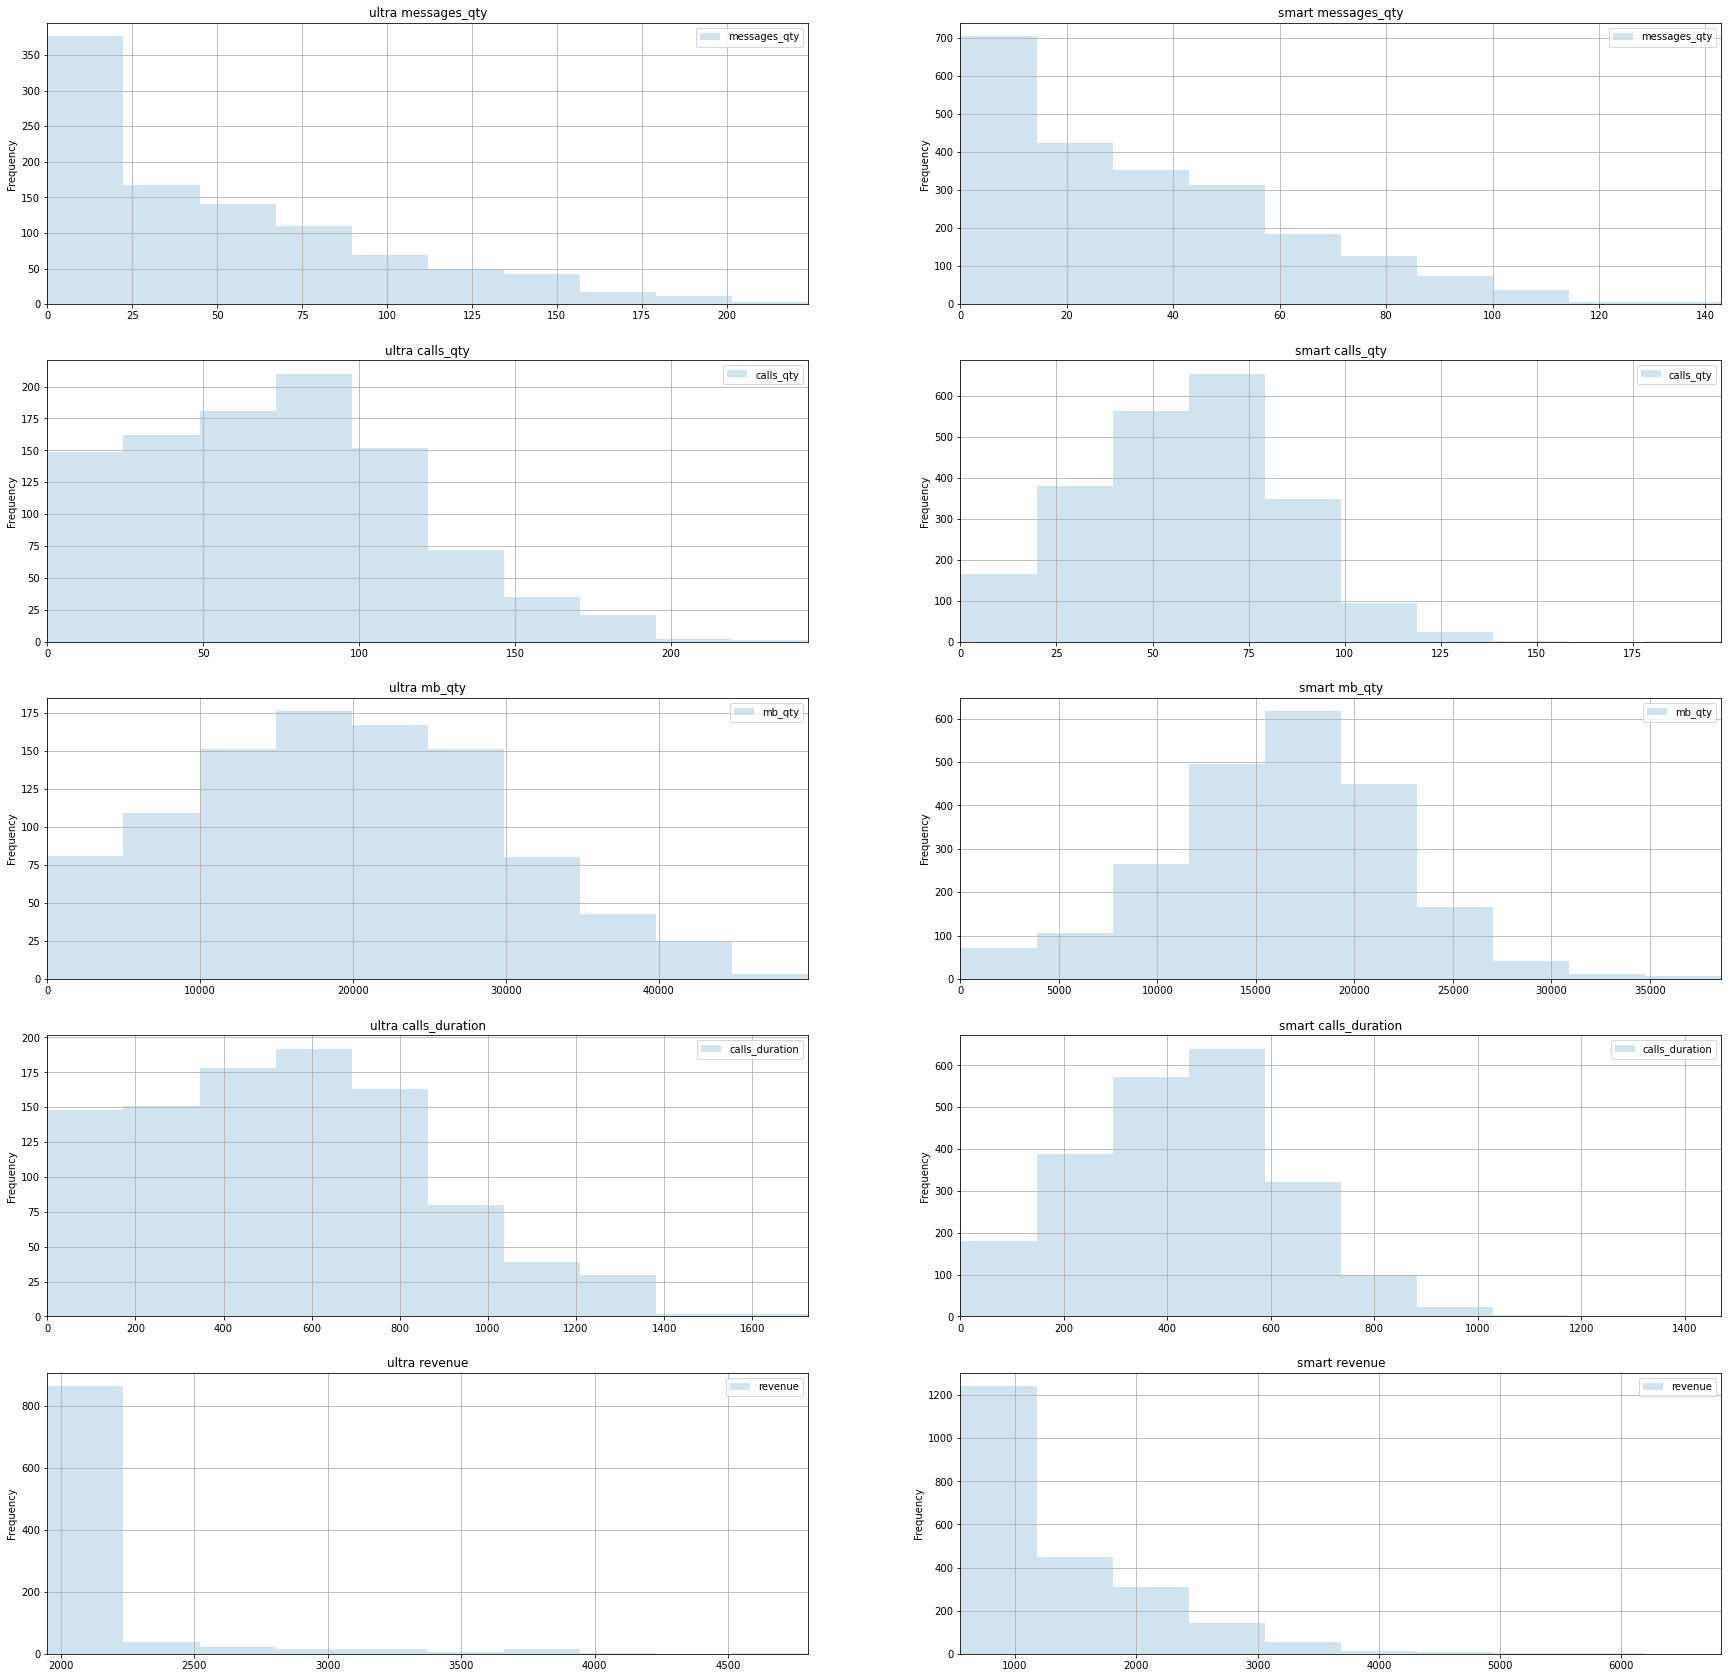

In [35]:
cols_for_hist = ['messages_qty', 'calls_qty', 'mb_qty','calls_duration','revenue']
draw_hist(cols_for_hist, 0, 1)

Посмотрим на графики поближе

C:\Users\nikotyan\PycharmProjects\yandex_project_2_property\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:482: UserWarning: Attempting to set identical left == right == 1950.0 results in singular transformations; automatically expanding.
  ax.set_xlim(self.xlim)


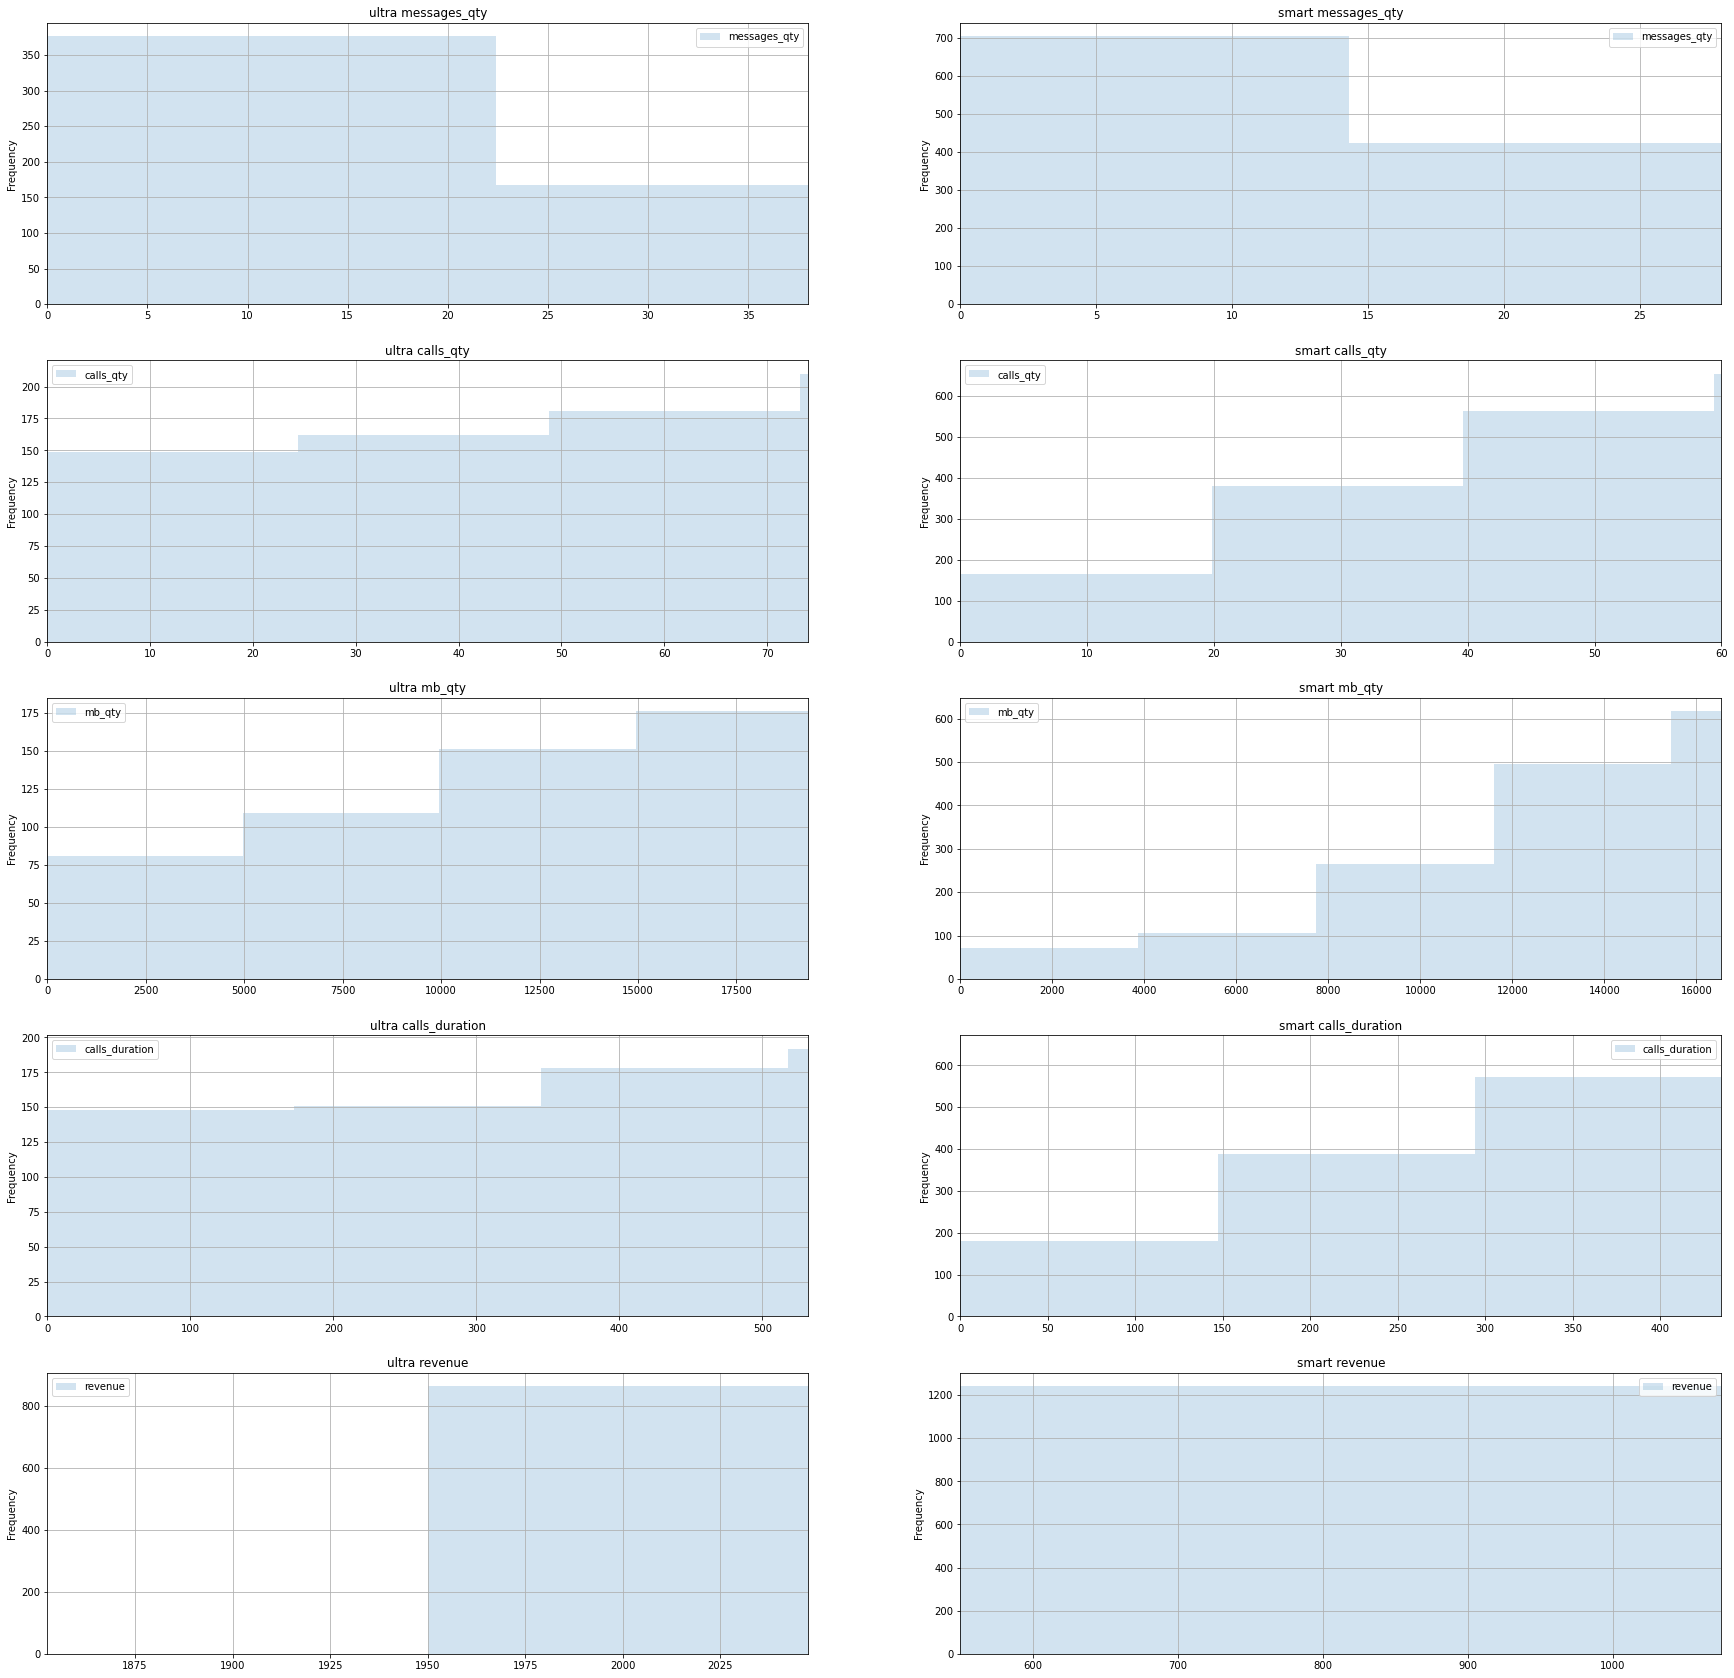

In [36]:
draw_hist( cols_for_hist, 0,0.5)

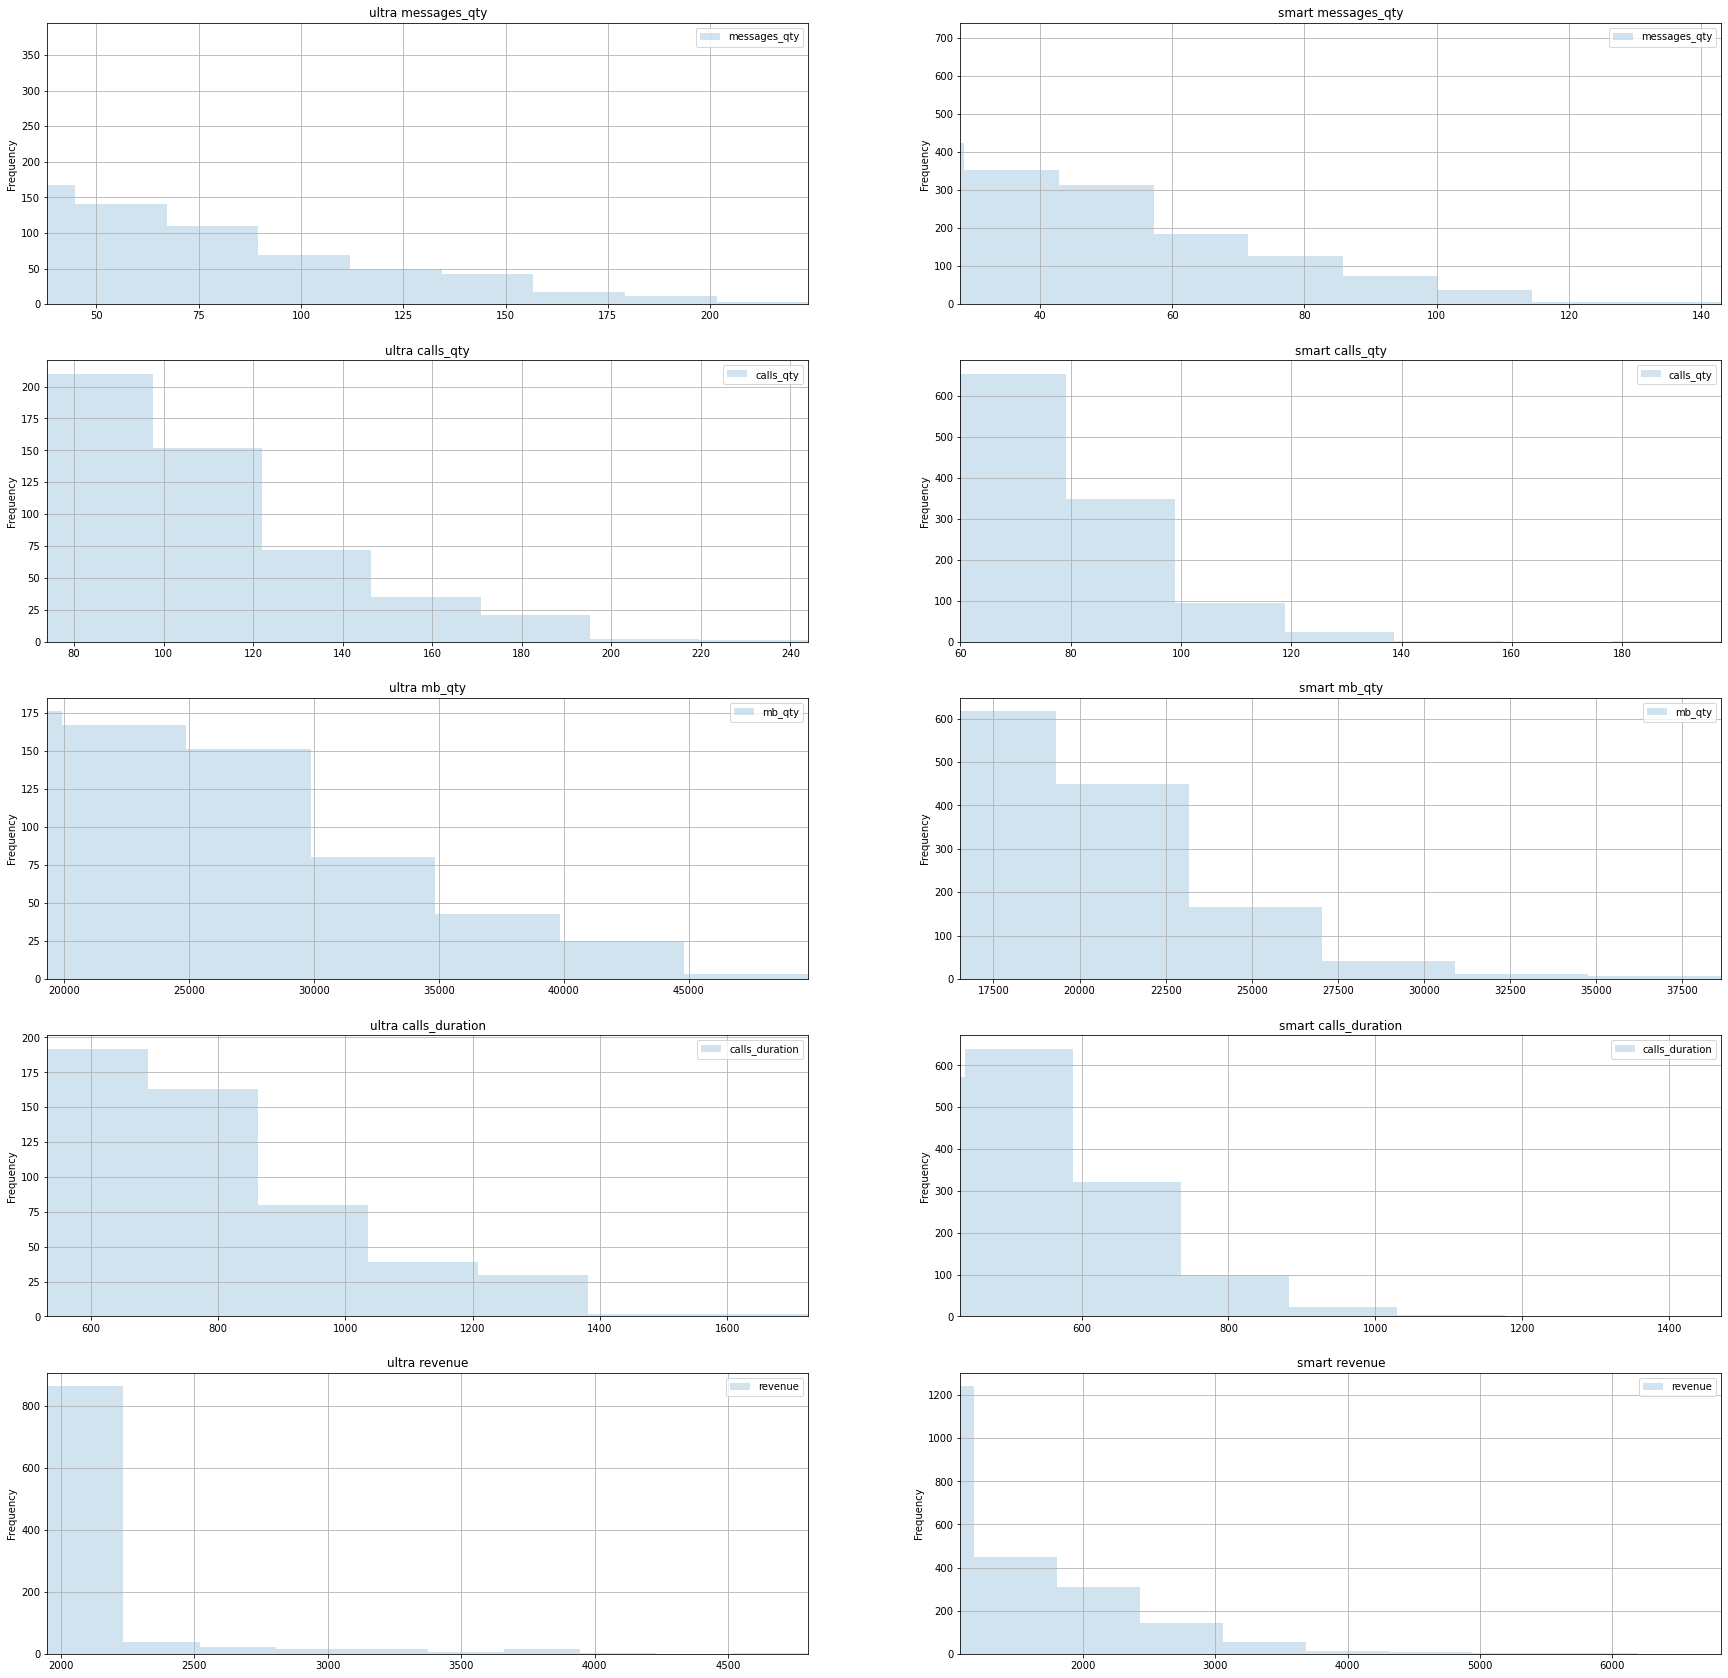

In [37]:
draw_hist( cols_for_hist, 0.5,1)

- Для обоих тарифов распределение количества сообщений похоже на распределение Пуассона. Распределение несимметричное и имеет длинный хвост справа. Для тарифа ультра большая часть сообщений равномерно распределена на отрезке от от 0 до примерно 22 сообщений после чего идет резкий спад. Для тарифа смарт более 50% сообщений равномерно распределено на отрезке от от 0 до примерно 13 сообщений после чего идет спад. У пользователей тарифа ультра у графика более длинный хвост. Это значит, что в тарифе ультра есть небольшая группа пользователей, отправляющщая более 150 сообщений в месяц, которой нет в тарифе смарт
- Для обоих тарифов распределение количества звонков несимметричны.
    - большая часть пользователей тарифа ультра совершает до 100 звонков в месяц. Пик лежит между 75 и 100 звонками в месяц. После пика в графике идет значительный спад. Максимально пользователи совершают около 250 звонков в месяц.
    - большая часть пользователей тарифа смарт совершает до 75 звонков в месяц. Пик лежит между 50 и 75 сообщениями в месяц. После пика идет значительный спад. Максимально пользователи совершают около 200 звонков в месяц

- Для обоих тарифов распределение количества потраченных мегабайт почти симметричное. Пик приходится около 20000 мегабайт Для тарифа смарт график имеет более выраженный пик, для тарифа ультра - график более сглаженный
- Для обоих тарифов пик длины звонков около 500 мин. Пользователи тарифа ультра больше совершают звонки до 750 минут в месяц. Для поьзователей тарифа смарт распределение длины звонков близко к нормальному: малое количество лдей совершают очень маленькие звонки и очень длинные звонки, чем ближе к пику ( 500 мин) - тем более часто люди совершают звонки такой продолжительности. 

Для обоих тарифов распределение выручки несимметричное и с длинным хвостом. По графикам видно, что больше людей превышает лимит в тарифе смарт.


### Вывод

- Видно, что пользователи тарифа "ультра" в среднем совершают больше звонков большей продолжительности, больше отправляют смс и больше пользуются интернетом чем пользователи тарифа "смарт". Это логично, так как в пакет "ультра" входит намного  больше звонков, смс и Мб интернета чем в пакет "смарт"
- Видно, что стандартное отклонение большое для всех показателей для обоих тарифов, что означает, что данные очень разбросаны от среднего значения. В тарифе ультра данные по показателям разбросаны в 1.5-2 раза больше чем в тарифе смарт
- Большинство графиков похожи по форме для обоих тарифов(количество сообщений, количество звонков, выручка). Распредление несимметричное и и имеет длинный хвост справа. По графикам видно то же, что и по средним показателям: пользователи тарифа ультра совершают больше звонков большей продолжительности, больше отправляют смс.
 - Для обоих тарифов распределение количества потраченных мегабайт почти симметричное. Пик приходится около 20000 мегабайт Для тарифа смарт график имеет более выраженный пик, для тарифа ультра - график более сглаженный
- Для обоих тарифов пик длины звонков в месяц около 500 мин. Пользователи тарифа ультра больше совершают звонки до 750 минут в месяц. Для поьзователей тарифа смарт распределение длины звонков близко к нормальному: малое количество людей совершают очень маленькие звонки и очень длинные звонки, чем ближе к пику ( 500 мин) - тем более часто люди совершают звонки такой продолжительности.

### <a id="step5"> Шаг 5. Проверка гипотез</a>

- Проверка гипотезы, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Выдвинем следующие гипотезы:
- Нулевая гипотеза: средняя выручка пользователей тарифа Ультра равна средней выручке тарифа Смарт
- Альтернативная гипотеза: средняя выручка пользователей тарифа Ультра не равна средней выручке тарифа Смарт

Зададим критический уровень значимости равный 0.05. При проверки будем использовать тест для сравнения средних двух генеральных совокупностей. 

In [38]:
alpha = .05
h_smart = smart_stats['revenue']
h_ultra = ultra_stats['revenue']

results = st.ttest_ind(
    h_ultra, 
    h_smart)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.857477410979865e-149
Отвергаем нулевую гипотезу


В результате проверки получилось, что p-value меньше чем критический уровеь значимости. Отсюда следует, что мы отвергаем нулевую гипотезу. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

- Проверка гипотезы, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Добавим в сводную таблицу информацию о том из какого города клиент

In [39]:
users_cities = users[['city','user_id']]
stats = stats.merge(users_cities, on = 'user_id', how = 'inner')
stats.head()

,user_id,month,mb_qty,messages_qty,calls_qty,calls_duration,tariff,revenue,city
0,1000,5,2257,22,22,164,ultra,1950,Краснодар
1,1000,6,23262,60,43,187,ultra,1950,Краснодар
2,1000,7,14017,75,47,346,ultra,1950,Краснодар
3,1000,8,14072,81,52,418,ultra,1950,Краснодар
4,1000,9,14583,57,58,478,ultra,1950,Краснодар


Выделим в нашей сводной таблице две выборки. Одна - для Москвы, другая - для остальных городов

In [40]:
stats_moscow = stats.query('city == "Москва"')
stats_region = stats.query('city != "Москва"')

- Нулевая гипотеза: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
- Альтернативная гипотеза: средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов
Зададим критический уровень значимости равный 0.05. При проверки будем использовать тест для сравнения средних двух генеральных совокупностей. 

In [41]:
alpha = .05
h_moscow = stats_moscow['revenue']
h_region = stats_region['revenue']

results = st.ttest_ind(
    h_moscow, 
    h_region)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.578869733775166
Не получилось отвергнуть нулевую гипотезу


В результате проверки получилось, что p-value больше чем критический уровень значимости. Отсюда следует, что при выбранном уровне значимости в 0.05 мы не можем отвергнуть нулевую гипотезу. То есть мы не можем отвергнуть гипотезу, что средняя выручка пользователей из Москвы равна средней выручке пользователей из регионов.

Было бы еще интересно проверить гипотезу, что люди из Москвы больше тратят на связь и мы получаем больше выручки от них на тарифе ультра. Для региона же наоборот - получаем больше выручки от тарифа смарт. Но, к сожалению, не знаю как это сделать и можно ли.

### Вывод

Проверили гипотезы и выяснили, что:
- При уровне значимости = 0.05 мы не можем отвергнуть гипотезу, что средняя выручка пользователей из Москвы равна средней выручке пользователей из регионов.
- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

### <a id = 'last'>Вывод</a>

- Изучили данные. Нашли ошибки в данных в виде нулей  в количестве минут в звонках иинтернет-сессиях по 0 мегабайт. Решили, что вместо них были очень маленькие значения и данные выгрузились из системы неверно. Заменили их на 1 минуту/1 Мб, т.к. оператор округляет все в большую сторону. 
- Заменили типы данных, там где это требовалось, проверили данные на дубликаты. 
- Сформировали сводную таблицу в разрезе пользователей и месяцев, содержащую характеристики, влияющие на оплату и саму сумму оплаты.
- Выяснили, что пользователи тарифа "ультра" в среднем совершают больше звонков большей продолжительности, больше отправляют смс и больше пользуются интернетом чем пользователи тарифа "смарт". Это логично, так как в пакет "ультра" входит намного  больше звонков, смс и Мб интернета чем в пакет "смарт"
- Видно, что стандартное отклонение большое для всех показателей для обоих тарифов, что означает, что данные очень разбросаны от среднего значения. В тарифе ультра данные по показателям разбросаны в 1.5-2 раза больше чем в тарифе смарт. 
- Выяснили, что ольшинство графиков похожи по форме для обоих тарифов(количество сообщений, количество звонков, выручка). Распределение несимметричное и и имеет длинный хвост справа.
- Проверили гипотезы. Выяснили, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Выяснили, что при уровне значимости = 0.05 мы не можем отвергнуть гипотезу, что средняя выручка пользователей из Москвы равна средней выручке пользователей из регионов.
- Было бы еще интересно проверить гипотезу, что люди из Москвы больше тратят на связь и мы получаем больше выручки от них на тарифе ультра. Для региона же наоборот - получаем больше выручки от тарифа смарт. Но, к сожалению, не знаю как это сделать и можно ли.